In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
#set display option to be maximum
pd.set_option('display.max_rows',None)

In [70]:
#read data
df=pd.read_csv(r'movies.csv')

In [4]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [6]:
# check the empy/null data each column
for col in df:
  prctg_missing=np.mean(df[col].isnull())
  print('{}-{}%'.format(col,round(prctg_missing*100)))

name-0%
rating-1%
genre-0%
year-0%
released-0%
score-0%
votes-0%
director-0%
writer-0%
star-0%
country-0%
budget-28%
gross-2%
company-0%
runtime-0%


In [71]:
# change type for badget and gross
df['budget']=df['budget'].astype('Int64')
df['gross']=df['gross'].astype('Int64')

In [83]:
# check the match of 'year' and released
new_released=df['released'].replace(to_replace=' ', value=',', regex=True)
seperate_new_release=new_released.str.split(',',expand=True)
new=pd.to_numeric(seperate_new_release[3], errors='coerce')
new_data=new.astype('Int64')
df[df['year']!=new_data][['year','released']].head(10)

,year,released
8,1980,"June 19, 1981 (United States)"
11,1980,"October 26, 1984 (United States)"
21,1980,"April 24, 1981 (United States)"
33,1980,"April 24, 1981 (United States)"
40,1980,"October 9, 1981 (United States)"
49,1980,"May 16, 1981 (Japan)"
54,1980,"April 8, 1981 (United States)"
59,1980,"March 13, 1981 (Ireland)"
62,1980,"February 5, 1981 (Argentina)"
79,1980,"November 18, 1983 (Sweden)"


In [72]:
#add new column for the correct year 
df['correct_year']=new_data


In [86]:
#drop any duplicates (just to check not permanent delete !)
df['company'].drop_duplicates().sort_values(ascending=False).head(10)

7129                        thefyzz
5664                    micro_scope
6412       iDeal Partners Film Fund
4007                       i5 Films
6793                     i am OTHER
6420                           erbp
3776                 double A Films
524       Zupnik-Curtis Enterprises
3330    Zucker Brothers Productions
146                Zoetrope Studios
Name: company, dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          7668 non-null   object 
 1   rating        7591 non-null   object 
 2   genre         7668 non-null   object 
 3   year          7668 non-null   int64  
 4   released      7666 non-null   object 
 5   score         7665 non-null   float64
 6   votes         7665 non-null   float64
 7   director      7668 non-null   object 
 8   writer        7665 non-null   object 
 9   star          7667 non-null   object 
 10  country       7665 non-null   object 
 11  budget        5497 non-null   Int64  
 12  gross         7479 non-null   Int64  
 13  company       7651 non-null   object 
 14  runtime       7664 non-null   float64
 15  correct_year  7609 non-null   Int64  
dtypes: Int64(3), float64(3), int64(1), object(9)
memory usage: 981.1+ KB


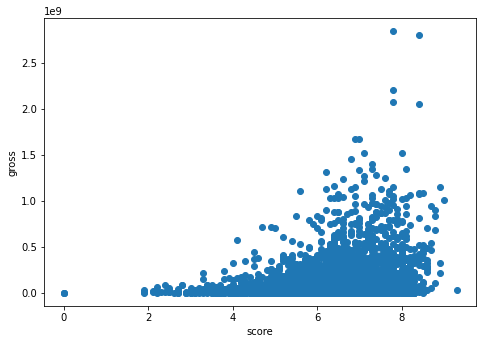

<Figure size 1152x648 with 0 Axes>

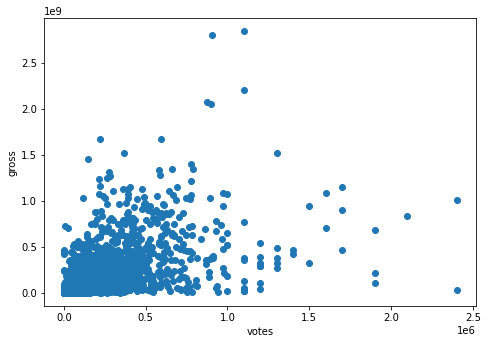

<Figure size 1152x648 with 0 Axes>

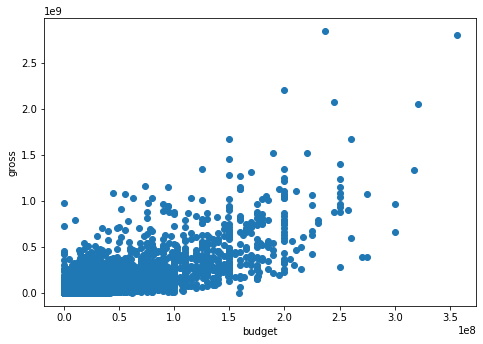

<Figure size 1152x648 with 0 Axes>

In [62]:
# check the field that have high correlation with 'Gross' using scattar plot
guest=['score','votes','budget']

for col in guest:
  fig=plt.figure()
  fig.add_axes([0, 0, 1, 1])
  plt.scatter(df[col].fillna(0),df['gross'].fillna(0))
  plt.xlabel(col)
  plt.ylabel('gross')
  plt.figure(figsize=(16,9))
  plt.show()




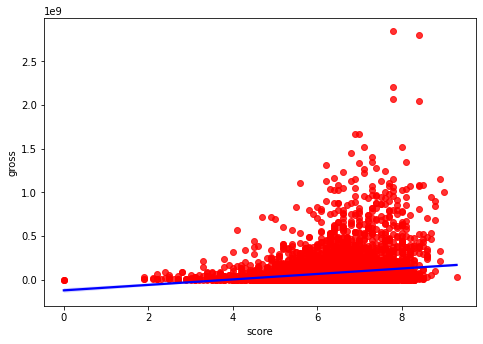

<Figure size 1152x648 with 0 Axes>

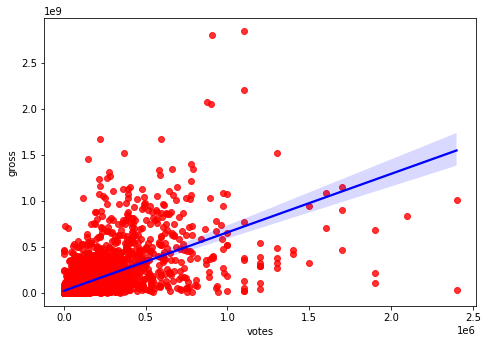

<Figure size 1152x648 with 0 Axes>

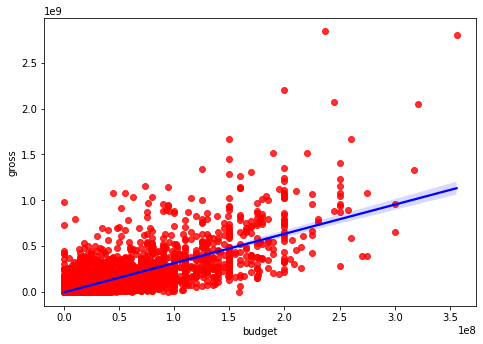

<Figure size 1152x648 with 0 Axes>

In [61]:
# using regression plot
guest=['score','votes','budget']
df_nonna=df.fillna(0)

for col in guest:
  fig=plt.figure()
  fig.add_axes([0, 0, 1, 1])
  sns.regplot(x=col, y='gross',data=df_nonna[[col,'gross']].astype('float32'), 
              scatter_kws={'color':'red'}, line_kws={'color':'blue'})
  plt.xlabel(col)
  plt.ylabel('gross')
  plt.figure(figsize=(16,9))
  plt.show()


In [51]:
# see the correlation
df[['score','votes','budget','gross']].corr() # pearson (default), kendall, spearman
# High correlation for gross is budget

,score,votes,budget,gross
score,1.000000,0.409182,0.076254,0.186258
votes,0.409182,1.000000,0.442429,0.630757
budget,0.076254,0.442429,1.000000,0.740395
gross,0.186258,0.630757,0.740395,1.000000


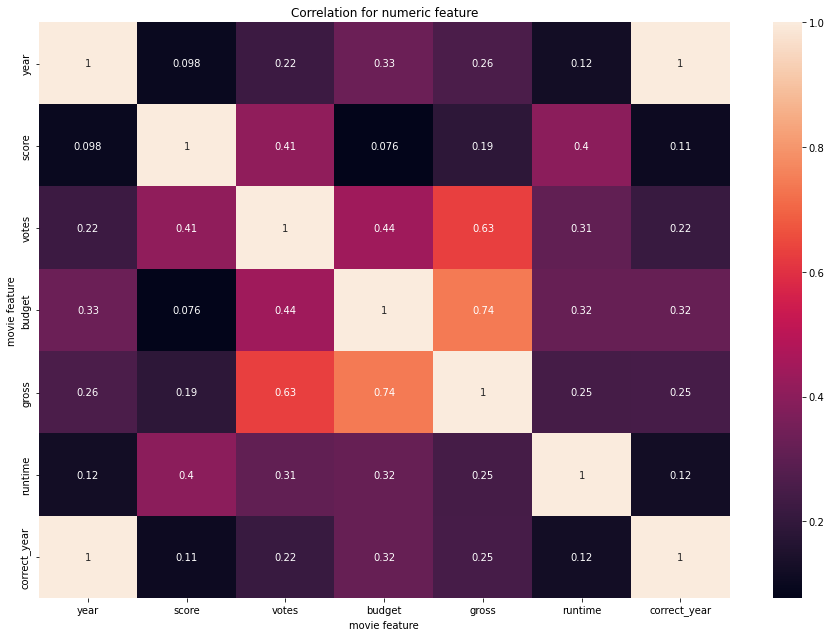

In [74]:
# visualize the correlation
fig=plt.figure()
fig.add_axes([0, 0, 2, 2])
correlation_matrix=df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation for numeric feature')
plt.xlabel('movie feature')
plt.ylabel('movie feature')
plt.show()

In [67]:
#  look the correlation for non-numeric data
df_numeric=df
for col in df_numeric.columns:
  if (df_numeric[col].dtype == 'object'):
    df_numeric[col]= df_numeric[col].astype('category')
    df_numeric[col]= df_numeric[col].cat.codes
  
df_numeric.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000,46998772,2319,146.0,1980
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000,58853106,731,104.0,1980
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000,538375067,1540,124.0,1980
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000,83453539,1812,88.0,1980
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000,39846344,1777,98.0,1980


In [73]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


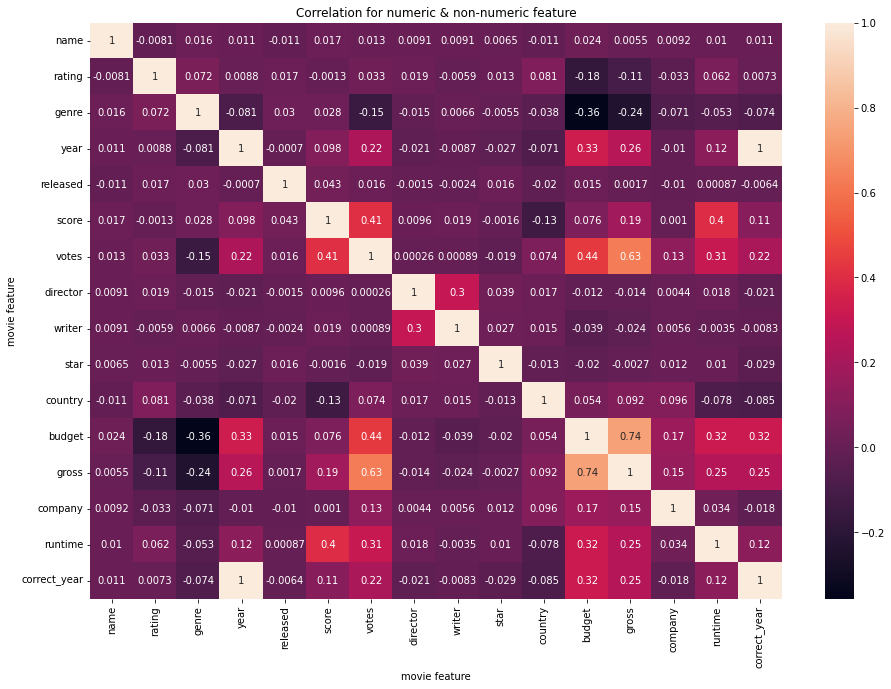

In [76]:
# visualize the correlation
fig=plt.figure()
fig.add_axes([0, 0, 2, 2])
correlation_matrix=df_numeric.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation for numeric & non-numeric feature')
plt.xlabel('movie feature')
plt.ylabel('movie feature')
plt.show()

In [87]:
# try sorted values for correlation
correlation_mat=df_numeric.corr()
corr_pairs=correlation_mat.unstack()
corr_pairs.head(10)

name  name        1.000000
      rating     -0.008069
      genre       0.016355
      year        0.011453
      released   -0.011311
      score       0.017097
      votes       0.013088
      director    0.009079
      writer      0.009081
      star        0.006472
dtype: float64

In [88]:
# sorted the pairs
sorted_pairs=corr_pairs.sort_values()
sorted_pairs.head(10)

genre    budget    -0.356564
budget   genre     -0.356564
gross    genre     -0.235650
genre    gross     -0.235650
rating   budget    -0.176002
budget   rating    -0.176002
genre    votes     -0.145307
votes    genre     -0.145307
score    country   -0.133348
country  score     -0.133348
dtype: float64

In [82]:
# looking for high correlation
high_corr=sorted_pairs[sorted_pairs>0.5]
high_corr

gross         votes           0.630757
votes         gross           0.630757
gross         budget          0.740395
budget        gross           0.740395
year          correct_year    0.997596
correct_year  year            0.997596
name          name            1.000000
company       company         1.000000
gross         gross           1.000000
budget        budget          1.000000
country       country         1.000000
star          star            1.000000
writer        writer          1.000000
director      director        1.000000
votes         votes           1.000000
score         score           1.000000
released      released        1.000000
year          year            1.000000
genre         genre           1.000000
rating        rating          1.000000
runtime       runtime         1.000000
correct_year  correct_year    1.000000
dtype: float64

votes and budget have high correlation to gross earnings